In [15]:
from typing import Type

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from sympy import Function, dsolve, Eq
from sympy.abc import x, z

from methods import F, Euler

# Параметры решения

**$f$ - исходная функция**  
$y'=f(x,y)$


In [16]:
y = Function("y")
eq = Eq(y(x).diff(x), x*sp.tan(y(x)/x) / x)

In [17]:
dx = 1e-2
x0, y0 = 1, 1
x1 = 3
n = abs(int((x1 - x0) / dx))


## Построение графика

In [18]:
def plot(exact: F | None, f: F, x0: float, y0: float, n: int = 1000, dx: float = 1e-2, *, method: Type[F] = Euler):
    space = np.linspace(x0, round(dx * n), n)
    if exact:
        Y = exact(space)
        plt.plot(space, Y, label="Exact")
    T = method(f, x0, y0, n, dx)
    plt.plot(T[:, 0], T[:, 1], label=method.__name__, linestyle='--')
    T = odeint(f, y0, space, tfirst=True)
    plt.plot(space, T, label="Scikit", linestyle='--')
    
    plt.legend()
    plt.show()

Eq(y(x), exp(Integral(tan(1/_u1)/(_u1*tan(1/_u1) - 1), (_u1, 1)))*exp(-Integral(tan(1/_u1)/(_u1*tan(1/_u1) - 1), (_u1, x/y(x)))))

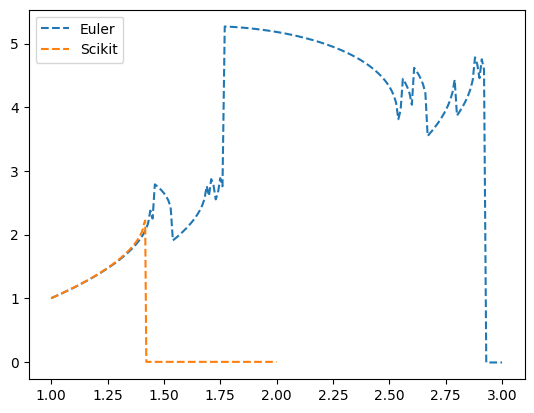

In [19]:
solution = dsolve(eq, y(x), ics={y(x0): y0})
#exact = sp.lambdify(x, solution.rhs, "numpy")
display(solution)

f = sp.lambdify((x, z), eq.rhs.subs(y(x), z))
plot(None, f, x0, y0, n, dx, method=Euler)